# ME 581 HW 1 Solution [Python3]
Yi Yang

## Problem 1
Verify that the function $f(x) = x^3 + x^2 - 3x - 3$ has a zero on the interval $(1,2)$ by plotting the function. Next, perform the first five iterations of the bisection method and verify that each approximation satifies the theoretical error bound of the bisection method, but that the actual errors do not steadily decrease. The exact location of the zero is $p = \sqrt{3}$.

Solution: The function $f(x)$ and an horizon line $h(x) = 0$ are plotted below, It is obvious that has a zero on the interval $(1,2)$.

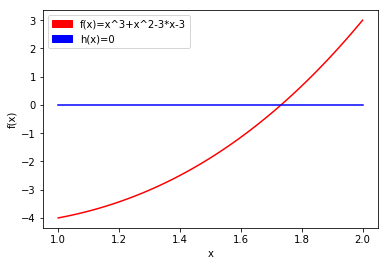

In [23]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

# set discrete x variables
x = np.linspace(1,2,101)
# evaluate function f(x) and h(x)
f = x**3 + x**2 - 3*x - 3
h = np.zeros(x.shape)
# plot f and h
plt.plot(x,f,"r")
plt.plot(x,h,"b")
# Axes and a legend are added
red_patch = mpatches.Patch(color='red',label='f(x)=x^3+x^2-3*x-3')
blue_patch = mpatches.Patch(color='blue',label='h(x)=0')
plt.legend(handles=[red_patch,blue_patch])
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

Now, we move forward to find five iterations of bisection methods, code is shown below:

In [24]:
# This script applies the Bisection Method to
# determine the zero of the function
# f(x)=x^3+x^2-3*x-3 in the range (1,2).

# An Introduction is printed
print('**ME581 Homework Printout**\n');
print('The Bisection Method is applied to calculate')
print('an estimate of the root ''p'' of the function');
print('f(x)=x^3+x^2-3*x-3 in the range (1,2):\n');

# Given: The function 'f' is redefined here and
# may be used in the manner f(1)=-1.
def f(x):
    var=x**3.0+(x**2.0)-3.0*x-3.0
    return var

# The left- and right-endpoints of the initial interval are
# defined as 'a' and 'b'.
a = 1
b = 2

# A convergence tolerance 'epsilon' is chosen and defined.
epsilon = 0.0001

# A maximum number of iterations is chosen and defined.
# This will be used to exit the script if the maximum
# number of iterations is exceeded.
Nmax = 5

# An Nmax-by-1 array of NaNs (Not-a-Number) is created to
# store the approximations 'p(ii)' for each iteration 'ii'
p = np.zeros(Nmax)
p.fill(np.nan)

# An index is created to keep track of the iteration number.
ii = 1

# The sign of the function f(x) at the latest value of the
# lower extreme 'a' is calculated and saved as 'sfa'.
# 'a' is the current value of the lower bound,'f()' evaluates
# the function 'f' at that value, and 'sign' calculates the
# sign of that value.
sfa = np.sign( f( a ) )

# A 'for' loop is created.
# For index ii ranging from 0, in increments of 1, up to the
# maximum number of iterations minus one (Nmax-1),
for ii in range(0,Nmax):
   
   # The new approximation 'p(ii)' to the root is
   # calculated as the midpoint of the interval and
   # is stored in the array 'p'.
   p[ii] = a + (b-a)/2
   
   # If the interval b-a is less than twice the tolerance
   # 'epsilon', then the convergence tolerance has been met,
   if ( (b-a) < (2*epsilon) ):
      
      # in which case the final estimate of the root is printed,
      # (Note that a line break '\' is used here inside the 
      # parentheses of the function 'print' and the following
      # line is indented, so that the code when printed will not
      # extend off the page.)
      print("Root Estimate #{0:d}: p({1:d}) = \
            {2:10.9e}".format(ii+1,ii+1,p[ii]))
      
      # and a message is printed to state that the convergence
      # tolerance has been met.
      print("The convergence tolerance has been met.")
      
      # and the 'for' loop is exited
      break
   
   # The value of the current root estimate is printed.
   print("Root Estimate #{0:d}: p({1:d}) = \
         {2:10.9e}".format(ii+1,ii+1,p[ii]))
   
   # Save the sign of f(p) as 'sfp'
   sfp = np.sign( f( p[ii] ) );
   
   # If the product of the two signs is less than zero,
   if ( (sfa*sfp) < 0.0 ):
      
      # then the signs of sfa and sfp are different and the new
      # interval will be (a,p), so the current 'p' becomes the new 'b'.
      b = p[ii]
      
   # otherwise (if the product of the two signs is not less than zero,)
   else:
      
      # the new interval will be (p,b), so the value of the current
      # 'p' becomes the new 'a'.
      a = p[ii]
      
      # and the sign of the current 'p', sfp, becomes the new sign of
      # the new 'a', 'sfa'.
      sfa = sfp

# Noting that 'range(0,Nmax)' will iterate ii from 0 to Nmax-1,
# The maximum number of iterations will be met when ii=Nmax-1.
# If the maximum number of iterations has been met,
if (ii >= (Nmax-1)):
   
   # A message is printed.
   print("The maximum number of {0:1d} iterations \
         has been met.".format(Nmax))

**ME581 Homework Printout**

The Bisection Method is applied to calculate
an estimate of the root p of the function
f(x)=x^3+x^2-3*x-3 in the range (1,2):

Root Estimate #1: p(1) =          1.500000000e+00
Root Estimate #2: p(2) =          1.750000000e+00
Root Estimate #3: p(3) =          1.625000000e+00
Root Estimate #4: p(4) =          1.687500000e+00
Root Estimate #5: p(5) =          1.718750000e+00
The maximum number of 5 iterations          has been met.


Now, we verify that each approximation satifies the theoretical error bound of the bisection method, but the actual errors do not steadily decrease.

In [25]:
print('**Error Printout**\n')
error_pb1 = np.zeros(Nmax)
error_pb1.fill(np.nan)
for ind, pact in enumerate(p):
    error_pb1[ind] = np.abs(pact - np.sqrt(3))
    if (error_pb1[ind] <= (2-1)/(2**(ind+1))):
        print("Error Estimate #{0:d}: err({1:d}) = {2:10.9e} \
        satifies the theoretical error bound.".format(ind+1,ind+1,error_pb1[ind]))
    else:
        print("Error Estimate #{0:d}: err({1:d}) = {2:10.9e} \
        does not satisfy the theoretical error bound.".format(ind+1,ind+1,error_pb1[ind]))

**Error Printout**

Error Estimate #1: err(1) = 2.320508076e-01         satifies the theoretical error bound.
Error Estimate #2: err(2) = 1.794919243e-02         satifies the theoretical error bound.
Error Estimate #3: err(3) = 1.070508076e-01         satifies the theoretical error bound.
Error Estimate #4: err(4) = 4.455080757e-02         satifies the theoretical error bound.
Error Estimate #5: err(5) = 1.330080757e-02         satifies the theoretical error bound.


From error list shown above, we can easily conclude that for the first 5 iterations each approximation satifies the theoretical error bound of the bisection method, but that the actual errors do not steadily decrease.

## Problem 2
Verify that the function $f(x) = x^6 - 3$ has a zero on the interval $(1,2)$. Next, perform the first five iterations of the bisection method and verify that each approximation satisfies the theoretical error bound of the bisection method.

Solution: The function f(x) is plotted below:

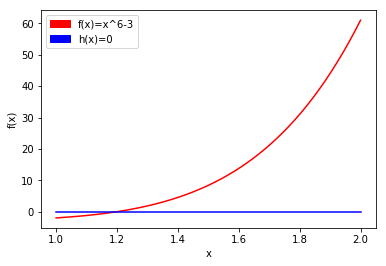

In [26]:
# set discrete x variables
x2 = np.linspace(1,2,201)
# evaluate function f(x) and h(x)
f2 = x2**6 - 3
h2 = np.zeros(x2.shape)
# plot f and h
plt.plot(x2,f2,"r")
plt.plot(x2,h2,"b")
# Axes and a legend are added
red_patch = mpatches.Patch(color='red',label='f(x)=x^6-3')
blue_patch = mpatches.Patch(color='blue',label='h(x)=0')
plt.legend(handles=[red_patch,blue_patch])
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

It is easily verified there is a zero in $(1,2)$. Next perform the first 5 iterations of bisection method to verify each approximation satifies the theoretical error bound. Also, $f(1) = -2 < 0$ and $f(2) = 61 > 0$, this means zero points exists in $(1,2)$.

In [27]:
# This script applies the Bisection Method to
# determine the zero of the function
# f(x)=x^3+x^2-3*x-3 in the range (1,2).

# An Introduction is printed
print('**ME581 Homework Printout**\n');
print('The Bisection Method is applied to calculate')
print('an estimate of the root ''p'' of the function');
print('f(x)=x^6-3 in the range (1,2):\n');

# Given: The function 'f' is redefined here and
# may be used in the manner f(1)=-1.
def f2(x):
    var=x**6.0-3.0
    return var

# The left- and right-endpoints of the initial interval are
# defined as 'a' and 'b'.
a2 = 1
b2 = 2

# A convergence tolerance 'epsilon' is chosen and defined.
epsilon2 = 0.0001

# A maximum number of iterations is chosen and defined.
# This will be used to exit the script if the maximum
# number of iterations is exceeded.
Nmax2 = 5

# An Nmax-by-1 array of NaNs (Not-a-Number) is created to
# store the approximations 'p(ii)' for each iteration 'ii'
p2 = np.zeros(Nmax2)
p2.fill(np.nan)

# An index is created to keep track of the iteration number.
ii2 = 1

# The sign of the function f(x) at the latest value of the
# lower extreme 'a' is calculated and saved as 'sfa'.
# 'a' is the current value of the lower bound,'f()' evaluates
# the function 'f' at that value, and 'sign' calculates the
# sign of that value.
sfa2 = np.sign( f2( a2 ) )

# A 'for' loop is created.
# For index ii ranging from 0, in increments of 1, up to the
# maximum number of iterations minus one (Nmax-1),
for ii2 in range(0,Nmax2):
   
   # The new approximation 'p(ii)' to the root is
   # calculated as the midpoint of the interval and
   # is stored in the array 'p'.
   p2[ii2] = a2 + (b2-a2)/2
   
   # If the interval b-a is less than twice the tolerance
   # 'epsilon', then the convergence tolerance has been met,
   if ( (b2-a2) < (2*epsilon2) ):
      
      # in which case the final estimate of the root is printed,
      # (Note that a line break '\' is used here inside the 
      # parentheses of the function 'print' and the following
      # line is indented, so that the code when printed will not
      # extend off the page.)
      print("Root Estimate #{0:d}: p({1:d}) = \
            {2:10.9e}".format(ii2+1,ii2+1,p2[ii2]))
      
      # and a message is printed to state that the convergence
      # tolerance has been met.
      print("The convergence tolerance has been met.")
      
      # and the 'for' loop is exited
      break
   
   # The value of the current root estimate is printed.
   print("Root Estimate #{0:d}: p({1:d}) = \
         {2:10.9e}".format(ii2+1,ii2+1,p2[ii2]))
   
   # Save the sign of f(p) as 'sfp'
   sfp2 = np.sign( f2( p2[ii2] ) );
   
   # If the product of the two signs is less than zero,
   if ( (sfa2*sfp2) < 0.0 ):
      
      # then the signs of sfa and sfp are different and the new
      # interval will be (a,p), so the current 'p' becomes the new 'b'.
      b2 = p2[ii2]
      
   # otherwise (if the product of the two signs is not less than zero,)
   else:
      
      # the new interval will be (p,b), so the value of the current
      # 'p' becomes the new 'a'.
      a2 = p2[ii2]
      
      # and the sign of the current 'p', sfp, becomes the new sign of
      # the new 'a', 'sfa'.
      sfa2 = sfp2

# Noting that 'range(0,Nmax)' will iterate ii from 0 to Nmax-1,
# The maximum number of iterations will be met when ii=Nmax-1.
# If the maximum number of iterations has been met,
if (ii2 >= (Nmax2-1)):
   
   # A message is printed.
   print("The maximum number of {0:1d} iterations \
         has been met.\n".format(Nmax2))
print('**Error Printout**\n')
error_pb2 = np.zeros(Nmax2)
error_pb2.fill(np.nan)
for ind2, pact2 in enumerate(p2):
    error_pb2[ind2] = np.abs(pact2 - 3**(1.0/6))
    if (error_pb2[ind2] <= (2-1)/(2**(ind2+1))):
        print("Error Estimate #{0:d}: err({1:d}) = {2:10.9e} \
        satifies the theoretical error bound.".format(ind2+1,ind2+1,error_pb2[ind2]))
    else:
        print("Error Estimate #{0:d}: err({1:d}) = {2:10.9e} \
        does not satisfy the theoretical error bound.".format(ind2+1,ind2+1,error_pb2[ind2]))

**ME581 Homework Printout**

The Bisection Method is applied to calculate
an estimate of the root p of the function
f(x)=x^6-3 in the range (1,2):

Root Estimate #1: p(1) =          1.500000000e+00
Root Estimate #2: p(2) =          1.250000000e+00
Root Estimate #3: p(3) =          1.125000000e+00
Root Estimate #4: p(4) =          1.187500000e+00
Root Estimate #5: p(5) =          1.218750000e+00
The maximum number of 5 iterations          has been met.

**Error Printout**

Error Estimate #1: err(1) = 2.990630448e-01         satifies the theoretical error bound.
Error Estimate #2: err(2) = 4.906304482e-02         satifies the theoretical error bound.
Error Estimate #3: err(3) = 7.593695518e-02         satifies the theoretical error bound.
Error Estimate #4: err(4) = 1.343695518e-02         satifies the theoretical error bound.
Error Estimate #5: err(5) = 1.781304482e-02         satifies the theoretical error bound.


It is obvious that each approximation satisfies the theoretical error bound of the bisection method.

## Problem 3
Approximate $\tfrac{1}{37}$ to five significant decimal places by applying the bisection method to the equation $\tfrac{1}{x}-37=0$. Include plots of the following:

   a) Approximate Root vs Iteration Number
    
   b) Absolute Error vs. Iteration Number.

Solution: We can easily verify the solution lies in the interval $(0.02,0.05)$.

In [28]:
print('**ME581 Homework Printout**\n')
print('The bisection Method is applied to estimate 1/37')
def f3(x):
    var = 1.0/x - 37.0
    return var
a3 = 0.02
b3 = 0.05
epsilon3 = 0.000005
Nmax3 = 20
p3 = np.zeros(Nmax3)
p3.fill(np.nan)
ii3 = 1
sfa3 = np.sign( f3( a3 ) )
for ii3 in range(0,Nmax3):
   p3[ii3] = a3 + (b3-a3)/2
   if ( (b3-a3) < (2*epsilon3) ):
      print("Root Estimate #{0:d}: p({1:d}) = \
            {2:6.5f}".format(ii3+1,ii3+1,p3[ii3]))
      print("The convergence tolerance has been met.")
      break
   print("Root Estimate #{0:d}: p({1:d}) = \
         {2:6.5f}".format(ii3+1,ii3+1,p3[ii3]))
   sfp3 = np.sign( f3( p3[ii3] ) );
   if ( (sfa3*sfp3) < 0.0 ):
      b3 = p3[ii3]
   else:
      a3 = p3[ii3]
      sfa3 = sfp3
if (ii3 >= (Nmax3-1)):
   print("The maximum number of {0:1d} iterations \
         has been met.\n".format(Nmax3))
print('**Error Printout**\n')
error_pb3 = np.zeros(ii3+1)
error_pb3.fill(np.nan)
for ind3, pact3 in enumerate(p3[0:ii3+1]):
    error_pb3[ind3] = np.abs(pact3 - 1.0/37.0)
    print("Error Estimate #{0:d}: err({1:d}) = {2:6.5f}".format(ind3+1,ind3+1,error_pb3[ind3]))

**ME581 Homework Printout**

The bisection Method is applied to estimate 1/37
Root Estimate #1: p(1) =          0.03500
Root Estimate #2: p(2) =          0.02750
Root Estimate #3: p(3) =          0.02375
Root Estimate #4: p(4) =          0.02563
Root Estimate #5: p(5) =          0.02656
Root Estimate #6: p(6) =          0.02703
Root Estimate #7: p(7) =          0.02680
Root Estimate #8: p(8) =          0.02691
Root Estimate #9: p(9) =          0.02697
Root Estimate #10: p(10) =          0.02700
Root Estimate #11: p(11) =          0.02702
Root Estimate #12: p(12) =          0.02702
Root Estimate #13: p(13) =             0.02703
The convergence tolerance has been met.
**Error Printout**

Error Estimate #1: err(1) = 0.00797
Error Estimate #2: err(2) = 0.00047
Error Estimate #3: err(3) = 0.00328
Error Estimate #4: err(4) = 0.00140
Error Estimate #5: err(5) = 0.00046
Error Estimate #6: err(6) = 0.00000
Error Estimate #7: err(7) = 0.00023
Error Estimate #8: err(8) = 0.00011
Error Estimate #9

The approximate roots and errors are shown above.

## Problem 4
The equation $x^7=3$ has a root on the interval $(1,2)$, namely $x=\sqrt[7]{3}$.

   a) Perform five iterations of Newton's method.

   b) For $n\ge 1$, compare $|p_n - p_{n-1}|$ with $|p_{n-1} - p|$ and $|p_{n} - p|$.

   c) For $n\ge 1$, compute the ratio $|p_n - p|/|p_{n-1} - p|^2$ and show that this value approaches $|{f}''(p)/2{f}'(p)|$.
   
Solution: The iteration using Newton's method is shown below: $f(x) = x^7-3$

In [29]:
print('**ME581 Homework Printout**\n')
print('Newton\'s method is applied to solve x^7 = 3')
# function and derivative is given
def f4(x):
    var = x**7.0 - 3.0
    return var
def df4(x):
    var = 7.0*x**6.0
    return var
epsilon4 = 0.000001
Nmax4 = 7
# array to save iterated values
p4 = np.zeros(Nmax4+1)
# array to save error
err41 = np.zeros(Nmax4)
err42 = np.zeros(Nmax4+1)
# set the initial iterated value
p4[0] = 2
err42[0] = np.abs(p4[0]-3.0**(1.0/7))
# now begin iteration
for ind4 in range(0,Nmax4):
    if (df4(p4[ind4]) == 0.0):
        print('Choose another starting point')
        break
    else:
        p4[ind4+1] = p4[ind4] - f4(p4[ind4])/df4(p4[ind4])
        err41[ind4] = np.abs(p4[ind4+1] - p4[ind4])
        err42[ind4+1] = np.abs(p4[ind4+1] - 3.0**(1.0/7))
        if (err41[ind4] < (2*epsilon4)):
            print("Root Estimate #{0:1d}: p({1:1d}) = \
            {2:6.5f}".format(ind4+1,ind4+1,p4[ind4+1]))
            print("The convergence tolerance has been met")
            break
        print("Root Estimate #{0:1d}: p({1:1d}) = \
        {2:6.5f}".format(ind4+1,ind4+1,p4[ind4+1]))
if (ind4 >= (Nmax4-1)):
    print('The maximum number of {0:1d} iterations \
    has been met.\n'.format(Nmax4))
print('**Error Printout**\n')
for ii4 in range(0,Nmax4):
    print("Error Estimate #{0:1d}: |p{1:d}-p{2:d}| \
    = {3:6.5f}, |p{4:d}-p| \
    = {5:6.5f}, |p{6:d}-p| \
    = {7:6.5f}".format(ii4+1,ii4+1,ii4,err41[ii4],ii4,err42[ii4],ii4+1,err42[ii4+1]))

**ME581 Homework Printout**

Newton's method is applied to solve x^7 = 3
Root Estimate #1: p(1) =         1.72098
Root Estimate #2: p(2) =         1.49162
Root Estimate #3: p(3) =         1.31744
Root Estimate #4: p(4) =         1.21120
Root Estimate #5: p(5) =         1.17392
Root Estimate #6: p(6) =         1.16997
Root Estimate #7: p(7) =         1.16993
The maximum number of 7 iterations     has been met.

**Error Printout**

Error Estimate #1: |p1-p0|     = 0.27902, |p0-p|     = 0.83007, |p1-p|     = 0.55105
Error Estimate #2: |p2-p1|     = 0.22936, |p1-p|     = 0.55105, |p2-p|     = 0.32169
Error Estimate #3: |p3-p2|     = 0.17418, |p2-p|     = 0.32169, |p3-p|     = 0.14751
Error Estimate #4: |p4-p3|     = 0.10624, |p3-p|     = 0.14751, |p4-p|     = 0.04127
Error Estimate #5: |p5-p4|     = 0.03729, |p4-p|     = 0.04127, |p5-p|     = 0.00399
Error Estimate #6: |p6-p5|     = 0.00395, |p5-p|     = 0.00399, |p6-p|     = 0.00004
Error Estimate #7: |p7-p6|     = 0.00004, |p6-p|     = 0

The first 5 iterations of Newton's method is shown above. From three different representations of error expressions, we can see the actual error converges to zero, the contigent difference of errors form a sequence also converge to zero. This is given by the fact: when error sequence converges, the Cauchy sequence generated by the error sequence also converges. Using values we got above, we can evalute c) part.

In [30]:
# compute the approached value
val4 = np.abs(42.0*(3.0**(5.0/7))/(2.0*df4(3.0**(1.0/7))))
# compute the sequence of the ratio
for iii4 in range(0,Nmax4):
    print("the ratio |p{0:d}-p|/|p{1:d}-p|^2 = \
    {2:6.5f}".format(iii4+1,iii4,err42[iii4+1]/(err42[iii4]**2)))
print("the approached value is: |f''(p)/2f'(p)| = {0:6.5f}".format(val4))

the ratio |p1-p|/|p0-p|^2 =     0.79977
the ratio |p2-p|/|p1-p|^2 =     1.05939
the ratio |p3-p|/|p2-p|^2 =     1.42545
the ratio |p4-p|/|p3-p|^2 =     1.89669
the ratio |p5-p|/|p4-p|^2 =     2.34090
the ratio |p6-p|/|p5-p|^2 =     2.54113
the ratio |p7-p|/|p6-p|^2 =     2.56402
the approached value is: |f''(p)/2f'(p)| = 2.56425


## Problem 5
For each of the functions given below, use the Newton's method algorithm to approximate all real roots. Use an absolute tolerance of $10^{-6}$ as a stopping condition. For each of the roots plot the logarithm of the absolute error $|e_n|$ at each iteration n against the logarithm of the absolute error at the previous iteration, and use this plot to calculate the order of convergence. Use these plots to comment on the convergence behavior of Newton's method.

a) $f(x) = e^x + x^2 - x - 4$

b) $f(x) = x^3 - x^2 - 10x + 7$

c) $f(x) = 1.05 - 1.04x + ln(x)$

Solution: a) Apply Newton's method to the first function, by plotting the figure of function, we can easily verify there exists two zeros for this function, we choose starting point to be -2 and 2 respectively.

**ME581 Homework Printout**

Newton's method is applied to function f(x)=e^x+x^2-x-4


Iteration from starting point p0=2.0
Root Estimate #1: p(1) =             1.481276, starting point 2.0
Root Estimate #2: p(2) =             1.306549, starting point 2.0
Root Estimate #3: p(3) =             1.288849, starting point 2.0
Root Estimate #4: p(4) =             1.288678, starting point 2.0
Root Estimate #5: p(5) =                 1.288678, starting point p0=2.0
The convergence tolerance has been met
The maximum number of 5 iterations         has been met.

**Error Printout**

Error Estimate #1: |p1-p0|         = 0.518724, starting point p0=2.0
Error Estimate #2: |p2-p1|         = 0.174727, starting point p0=2.0
Error Estimate #3: |p3-p2|         = 0.017700, starting point p0=2.0
Error Estimate #4: |p4-p3|         = 0.000171, starting point p0=2.0
Error Estimate #5: |p5-p4|         = 0.000000, starting point p0=2.0


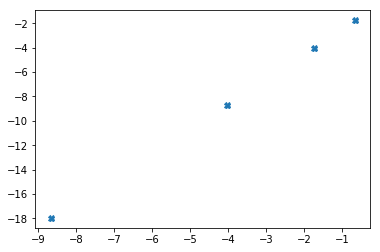



Iteration from starting point p0=-2.0
Root Estimate #1: p(1) =             -1.561052, starting point -2.0
Root Estimate #2: p(2) =             -1.507923, starting point -2.0
Root Estimate #3: p(3) =             -1.507100, starting point -2.0
Root Estimate #4: p(4) =                 -1.507099, starting point p0=-2.0
The convergence tolerance has been met
**Error Printout**

Error Estimate #1: |p1-p0|         = 0.438948, starting point p0=-2.0
Error Estimate #2: |p2-p1|         = 0.053129, starting point p0=-2.0
Error Estimate #3: |p3-p2|         = 0.000823, starting point p0=-2.0
Error Estimate #4: |p4-p3|         = 0.000000, starting point p0=-2.0
Error Estimate #5: |p5-p4|         = 0.000000, starting point p0=-2.0


/apps/share64/debian7/anaconda/anaconda3-4.4/lib/python3.6/site-packages/ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in log


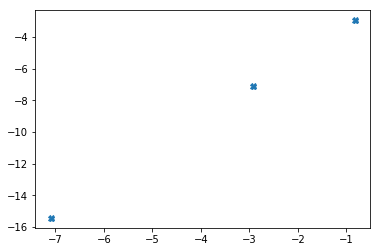

In [31]:
print('**ME581 Homework Printout**\n')
print('Newton\'s method is applied to function f(x)=e^x+x^2-x-4')
# function and derivative is given
def f51(x):
    var = np.exp(x) + x**2.0 - x - 4.0
    return var
def df51(x):
    var = np.exp(x) + 2.0*x - 1.0
    return var
epsilon51 = 1.0e-6
Nmax51 = 5
# array to save iterated values
p51 = np.zeros([2,Nmax51+1])
# array to save error
err51 = np.zeros([2,Nmax51])
#err42 = np.zeros(Nmax4+1)
# set the initial iterated value
p51[0][0] = 2.0
p51[1][0] = -2.0
#err42[0] = np.abs(p4[0]-3.0**(1.0/7))
# now begin iteration
for i51 in range(2):
    print('\n')
    print("Iteration from starting point p0={0:2.1f}".format(p51[i51][0]))
    for ind51 in range(0,Nmax51):
        if (df51(p51[i51][ind51]) == 0.0):
            print('Choose another starting point')
            break
        else:
            p51[i51][ind51+1] = p51[i51][ind51] - f51(p51[i51][ind51])/df51(p51[i51][ind51])
            err51[i51][ind51] = np.abs(p51[i51][ind51+1] - p51[i51][ind51])
            #err42[ind4+1] = np.abs(p4[ind4+1] - 3.0**(1.0/7))
            if (err51[i51][ind51] < (2*epsilon51)):
                print("Root Estimate #{0:1d}: p({1:1d}) = \
                {2:7.6f}, starting point p0={3:2.1f}".format(ind51+1,ind51+1,p51[i51][ind51+1],p51[i51][0]))
                print("The convergence tolerance has been met")
                break
            print("Root Estimate #{0:1d}: p({1:1d}) = \
            {2:7.6f}, starting point {3:2.1f}".format(ind51+1,ind51+1,p51[i51][ind51+1],p51[i51][0]))
    if (ind51 >= (Nmax51-1)):
        print('The maximum number of {0:1d} iterations \
        has been met.\n'.format(Nmax51))
    print('**Error Printout**\n')
    for ii51 in range(0,Nmax51):
        print("Error Estimate #{0:1d}: |p{1:d}-p{2:d}| \
        = {3:7.6f}, starting point p0={4:2.1f}".format(ii51+1,ii51+1,ii51,err51[i51][ii51],p51[i51][0]))
    # plot the log error figure
    plt.figure(i51+1)
    plt.plot(np.log(err51[i51][:-1]),np.log(err51[i51][1:]),"X")
    plt.show()    
        

Approximate the slope of the logrithm error plot, we can conclude the order of convergence is 2.

b) Now we use the similar method to process function $f(x) = x^3 - x^2 -10x + 7$. From plots of this function, we can easily verify it has three zeros, we set the initial iterated values to be -3, 0, 4 respectively.

**ME581 Homework Printout**

Newton's method is applied to function f(x)=x^3-x^2-10x+7


Iteration from starting point p0=-3.0
Root Estimate #1: p(1) =             -3.043478, starting point -3.0
Root Estimate #2: p(2) =             -3.042683, starting point -3.0
Root Estimate #3: p(3) =                 -3.042683, starting point p0=-3.0
The convergence tolerance has been met
**Error Printout**

Error Estimate #1: |p1-p0|         = 0.043478, starting point p0=-3.0
Error Estimate #2: |p2-p1|         = 0.000795, starting point p0=-3.0
Error Estimate #3: |p3-p2|         = 0.000000, starting point p0=-3.0
Error Estimate #4: |p4-p3|         = 0.000000, starting point p0=-3.0
Error Estimate #5: |p5-p4|         = 0.000000, starting point p0=-3.0


/apps/share64/debian7/anaconda/anaconda3-4.4/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log


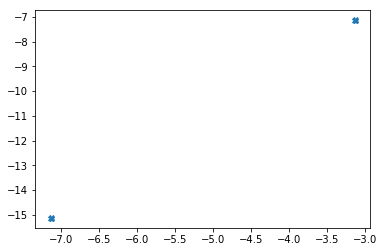



Iteration from starting point p0=0.0
Root Estimate #1: p(1) =             0.700000, starting point 0.0
Root Estimate #2: p(2) =             0.685196, starting point 0.0
Root Estimate #3: p(3) =             0.685220, starting point 0.0
Root Estimate #4: p(4) =                 0.685220, starting point p0=0.0
The convergence tolerance has been met
**Error Printout**

Error Estimate #1: |p1-p0|         = 0.700000, starting point p0=0.0
Error Estimate #2: |p2-p1|         = 0.014804, starting point p0=0.0
Error Estimate #3: |p3-p2|         = 0.000024, starting point p0=0.0
Error Estimate #4: |p4-p3|         = 0.000000, starting point p0=0.0
Error Estimate #5: |p5-p4|         = 0.000000, starting point p0=0.0


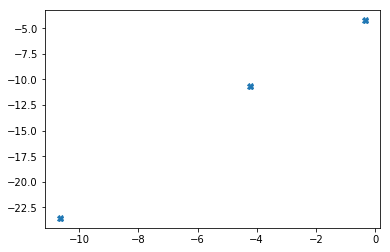



Iteration from starting point p0=4.0
Root Estimate #1: p(1) =             3.500000, starting point 4.0
Root Estimate #2: p(2) =             3.367089, starting point 4.0
Root Estimate #3: p(3) =             3.357511, starting point 4.0
Root Estimate #4: p(4) =             3.357463, starting point 4.0
Root Estimate #5: p(5) =                 3.357463, starting point p0=4.0
The convergence tolerance has been met
The maximum number of 5 iterations         has been met.

**Error Printout**

Error Estimate #1: |p1-p0|         = 0.500000, starting point p0=4.0
Error Estimate #2: |p2-p1|         = 0.132911, starting point p0=4.0
Error Estimate #3: |p3-p2|         = 0.009577, starting point p0=4.0
Error Estimate #4: |p4-p3|         = 0.000049, starting point p0=4.0
Error Estimate #5: |p5-p4|         = 0.000000, starting point p0=4.0


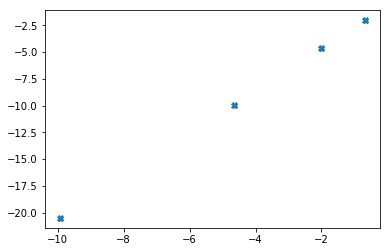

In [32]:
print('**ME581 Homework Printout**\n')
print('Newton\'s method is applied to function f(x)=x^3-x^2-10x+7')
# function and derivative is given
def f52(x):
    var = x**3.0 - x**2.0 - 10*x + 7
    return var
def df52(x):
    var = 3.0*x**2.0 - 2.0*x - 10
    return var
epsilon52 = 1.0e-6
Nmax52 = 5
# array to save iterated values
p52 = np.zeros([3,Nmax52+1])
# array to save error
err52 = np.zeros([3,Nmax52])
#err42 = np.zeros(Nmax4+1)
# set the initial iterated value
p52[0][0] = -3.0
p52[1][0] = 0.0
p52[2][0] = 4.0
#err42[0] = np.abs(p4[0]-3.0**(1.0/7))
# now begin iteration
for i52 in range(3):
    print('\n')
    print("Iteration from starting point p0={0:2.1f}".format(p52[i52][0]))
    for ind52 in range(0,Nmax52):
        if (df52(p52[i52][ind52]) == 0.0):
            print('Choose another starting point')
            break
        else:
            p52[i52][ind52+1] = p52[i52][ind52] - f52(p52[i52][ind52])/df52(p52[i52][ind52])
            err52[i52][ind52] = np.abs(p52[i52][ind52+1] - p52[i52][ind52])
            #err42[ind4+1] = np.abs(p4[ind4+1] - 3.0**(1.0/7))
            if (err52[i52][ind52] < (2*epsilon52)):
                print("Root Estimate #{0:1d}: p({1:1d}) = \
                {2:7.6f}, starting point p0={3:2.1f}".format(ind52+1,ind52+1,p52[i52][ind52+1],p52[i52][0]))
                print("The convergence tolerance has been met")
                break
            print("Root Estimate #{0:1d}: p({1:1d}) = \
            {2:7.6f}, starting point {3:2.1f}".format(ind52+1,ind52+1,p52[i52][ind52+1],p52[i52][0]))
    if (ind52 >= (Nmax52-1)):
        print('The maximum number of {0:1d} iterations \
        has been met.\n'.format(Nmax52))
    print('**Error Printout**\n')
    for ii52 in range(0,Nmax52):
        print("Error Estimate #{0:1d}: |p{1:d}-p{2:d}| \
        = {3:7.6f}, starting point p0={4:2.1f}".format(ii52+1,ii52+1,ii52,err52[i52][ii52],p52[i52][0]))
    # plot the log error figure
    plt.figure(i52+1)
    plt.plot(np.log(err52[i52][:-1]),np.log(err52[i52][1:]),"X")
    plt.show()    

Three approximate zeros for this function are approximated. Calculate the slope of three logtithm error plot, we conclude the order of convergence for this algorithm is 2.

c) Now we solve the zeros of the last function and generalize the order of convergence of Newton's method. By plotting the function we see there exists two zeros and the initial iterated values are set to be 0.5 and 1.5.

**ME581 Homework Printout**

Newton's method is applied to function f(x)=1.05-1.04x+ln(x)


Iteration from starting point p0=0.5
Root Estimate #1: p(1) =             0.669945, starting point 0.5
Root Estimate #2: p(2) =             0.774444, starting point 0.5
Root Estimate #3: p(3) =             0.818351, starting point 0.5
Root Estimate #4: p(4) =             0.826863, starting point 0.5
Root Estimate #5: p(5) =             0.827180, starting point 0.5
Root Estimate #6: p(6) =                 0.827181, starting point p0=0.5
The convergence tolerance has been met
**Error Printout**

Error Estimate #1: |p1-p0|         = 0.169945, starting point p0=0.5
Error Estimate #2: |p2-p1|         = 0.104499, starting point p0=0.5
Error Estimate #3: |p3-p2|         = 0.043907, starting point p0=0.5
Error Estimate #4: |p4-p3|         = 0.008512, starting point p0=0.5
Error Estimate #5: |p5-p4|         = 0.000317, starting point p0=0.5
Error Estimate #6: |p6-p5|         = 0.000000, starting point p0

/apps/share64/debian7/anaconda/anaconda3-4.4/lib/python3.6/site-packages/ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in log


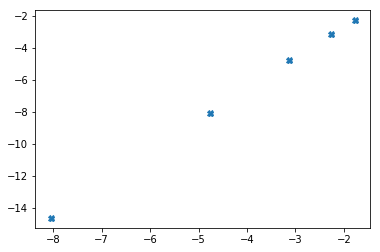



Iteration from starting point p0=1.5
Root Estimate #1: p(1) =             1.219996, starting point 1.5
Root Estimate #2: p(2) =             1.129456, starting point 1.5
Root Estimate #3: p(3) =             1.110712, starting point 1.5
Root Estimate #4: p(4) =             1.109715, starting point 1.5
Root Estimate #5: p(5) =             1.109712, starting point 1.5
Root Estimate #6: p(6) =                 1.109712, starting point p0=1.5
The convergence tolerance has been met
**Error Printout**

Error Estimate #1: |p1-p0|         = 0.280004, starting point p0=1.5
Error Estimate #2: |p2-p1|         = 0.090540, starting point p0=1.5
Error Estimate #3: |p3-p2|         = 0.018744, starting point p0=1.5
Error Estimate #4: |p4-p3|         = 0.000997, starting point p0=1.5
Error Estimate #5: |p5-p4|         = 0.000003, starting point p0=1.5
Error Estimate #6: |p6-p5|         = 0.000000, starting point p0=1.5
Error Estimate #7: |p7-p6|         = 0.000000, starting point p0=1.5


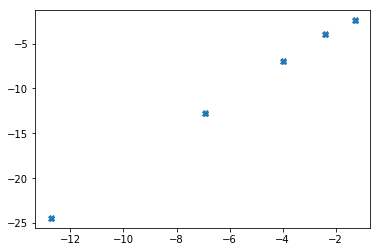

In [33]:
print('**ME581 Homework Printout**\n')
print('Newton\'s method is applied to function f(x)=1.05-1.04x+ln(x)')
# function and derivative is given
def f53(x):
    var = 1.05 - 1.04*x + np.log(x)
    return var
def df53(x):
    var = -1.04 + 1.0/x
    return var
epsilon53 = 1.0e-6
Nmax53 = 7
# array to save iterated values
p53 = np.zeros([2,Nmax53+1])
# array to save error
err53 = np.zeros([2,Nmax53])
#err42 = np.zeros(Nmax4+1)
# set the initial iterated value
p53[0][0] = 0.5
p53[1][0] = 1.5
#err42[0] = np.abs(p4[0]-3.0**(1.0/7))
# now begin iteration
for i53 in range(2):
    print('\n')
    print("Iteration from starting point p0={0:2.1f}".format(p53[i53][0]))
    for ind53 in range(0,Nmax53):
        if (df53(p53[i53][ind53]) == 0.0):
            print('Choose another starting point')
            break
        else:
            p53[i53][ind53+1] = p53[i53][ind53] - f53(p53[i53][ind53])/df53(p53[i53][ind53])
            err53[i53][ind53] = np.abs(p53[i53][ind53+1] - p53[i53][ind53])
            #err42[ind4+1] = np.abs(p4[ind4+1] - 3.0**(1.0/7))
            if (err53[i53][ind53] < (2*epsilon53)):
                print("Root Estimate #{0:1d}: p({1:1d}) = \
                {2:7.6f}, starting point p0={3:2.1f}".format(ind53+1,ind53+1,p53[i53][ind53+1],p53[i53][0]))
                print("The convergence tolerance has been met")
                break
            print("Root Estimate #{0:1d}: p({1:1d}) = \
            {2:7.6f}, starting point {3:2.1f}".format(ind53+1,ind53+1,p53[i53][ind53+1],p53[i53][0]))
    if (ind53 >= (Nmax53-1)):
        print('The maximum number of {0:1d} iterations \
        has been met.\n'.format(Nmax53))
    print('**Error Printout**\n')
    for ii53 in range(0,Nmax53):
        print("Error Estimate #{0:1d}: |p{1:d}-p{2:d}| \
        = {3:7.6f}, starting point p0={4:2.1f}".format(ii53+1,ii53+1,ii53,err53[i53][ii53],p53[i53][0]))
    # plot the log error figure
    plt.figure(i53+1)
    plt.plot(np.log(err53[i53][:-1]),np.log(err53[i53][1:]),"X")
    plt.show()

Two zeros of this function are solved and shown above, the slope of two logrithm errors curves are approximated to be 2 roughly. Hence we can conclude that Newton's method is with order of convergence at least equal to 2. This can be proven by setting $g(x) = x - \tfrac{f(x)}{f'(x)}$ and use Taylor expansion to express $g(x)$ at the fixed point $s$ of $g(x)$.

## Problem 6
Consider the function $f(x) = (3x)(1-\cos(\pi x))$, which has a root of multiplicity three at $x = 0$. Apply ten iterations of Newton's method to this equation with a starting value of $p_0 = 0.5$. Comment on the order of convergence.

Solution: The first ten iterations and the approximation of order of convergence is shown below:

**ME581 Homework Printout**

Newton's method is applied to function f(x)=(3x)(1-cos(pix))


Iteration from starting point p0=0.5
Root Estimate #1: p(1) =         0.305508, starting point 0.5
Root Estimate #2: p(2) =         0.198088, starting point 0.5
Root Estimate #3: p(3) =         0.130597, starting point 0.5
Root Estimate #4: p(4) =         0.086653, starting point 0.5
Root Estimate #5: p(5) =         0.057649, starting point 0.5
Root Estimate #6: p(6) =         0.038398, starting point 0.5
Root Estimate #7: p(7) =         0.025588, starting point 0.5
Root Estimate #8: p(8) =         0.017056, starting point 0.5
Root Estimate #9: p(9) =         0.011369, starting point 0.5
Root Estimate #10: p(10) =         0.007579, starting point 0.5
The maximum number of 10 iterations     has been met.

**Error Printout**

Error Estimate #1: |p1-p0|     = 0.194492, starting point p0=0.5
Error Estimate #2: |p2-p1|     = 0.107420, starting point p0=0.5
Error Estimate #3: |p3-p2|     = 0.067491, s

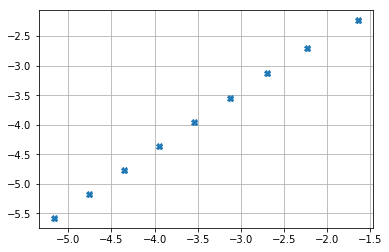

LinregressResult(slope=0.9602391425082597, intercept=-0.57658895388253262, rvalue=0.99938780923244708, pvalue=1.8680231195693883e-11, stderr=0.012705397166337827)

In [34]:
print('**ME581 Homework Printout**\n')
print('Newton\'s method is applied to function f(x)=(3x)(1-cos(pix))')
import math
from scipy.stats import linregress
# function and derivative is given
def f6(x):
    var = (3.0*x)*(1.0 - np.cos(math.pi*x))
    return var
def df6(x):
    var = 3.0 - 3.0*np.cos(math.pi*x) + 3.0*math.pi*x*np.sin(math.pi*x)
    return var
epsilon6 = 1.0e-6
Nmax6 = 10
# array to save iterated values
p6 = np.zeros(Nmax6+1)
# array to save error
err6 = np.zeros([Nmax6])
#err42 = np.zeros(Nmax4+1)
# set the initial iterated value
p6[0] = 0.5
#err42[0] = np.abs(p4[0]-3.0**(1.0/7))
# now begin iteration
print('\n')
print("Iteration from starting point p0={0:2.1f}".format(p6[0]))
for ind6 in range(0,Nmax6):
    if (df6(p6[ind6]) == 0.0):
        print('Choose another starting point')
        break
    else:
        p6[ind6+1] = p6[ind6] - f6(p6[ind6])/df6(p6[ind6])
        err6[ind6] = np.abs(p6[ind6+1] - p6[ind6])
        #err42[ind4+1] = np.abs(p4[ind4+1] - 3.0**(1.0/7))
        if (err6[ind6] < (2*epsilon6)):
            print("Root Estimate #{0:1d}: p({1:1d}) = \
            {2:7.6f}, starting point p0={3:2.1f}".format(ind6+1,ind6+1,p6[ind6+1],p6[0]))
            print("The convergence tolerance has been met")
            break
        print("Root Estimate #{0:1d}: p({1:1d}) = \
        {2:7.6f}, starting point {3:2.1f}".format(ind6+1,ind6+1,p6[ind6+1],p6[0]))
if (ind6 >= (Nmax6-1)):
    print('The maximum number of {0:1d} iterations \
    has been met.\n'.format(Nmax6))
print('**Error Printout**\n')
for ii6 in range(0,Nmax6):
    print("Error Estimate #{0:1d}: |p{1:d}-p{2:d}| \
    = {3:7.6f}, starting point p0={4:2.1f}".format(ii6+1,ii6+1,ii6,err6[ii6],p6[0]))
# plot the log error figure
plt.figure()
plt.plot(np.log(err6[:-1]),np.log(err6[1:]),"X")
plt.grid(True)
plt.show()
linregress(np.log(err6[:-1]),np.log(err6[1:]))

It means that with respect to this special function, Newton's method is of linear convergence (order of convergence equals 1). This can be shown as below:
$$g(x) = x - \frac{f(x)}{f'(x)} = \frac{3\pi x^2\sin(\pi x)}{3 - 3\cos(\pi x) + 3\pi x\sin(\pi x)}$$
We take the first derivative of function $g(x)$ see that $g'(x) \neq 0$, i.e., function $f(x)$ using Newton's method to iterate for zeros has order of convergence equal to 1.

## Problem 7
The function $f(x) = \sin(x)$ has a zero on the interval $(3,4)$, namely $x = \pi$. Perform three iterations of Newton's method to approximate this zero, using $p_0 = 4$. Determine the absolute error in each of the computed approximations. What is the apparent order of convergence? What explanation can you provide for this behavior?

Solution: Apply Newton's method to this function and codes are shown below:

**ME581 Homework Printout**

Newton's method is applied to function f(x)=sin(x)


Iteration from starting point p0=4.0
Root Estimate #1: p(1) =         2.842179, starting point 4.0
Root Estimate #2: p(2) =         3.150873, starting point 4.0
Root Estimate #3: p(3) =             3.141592, starting point p0=4.0
The convergence tolerance has been met
The maximum number of 3 iterations     has been met.

**Error Printout**

Error Estimate #0: |p0-pi|     = 0.858407, starting point p0=4.0
Error Estimate #1: |p1-pi|     = 0.299414, starting point p0=4.0
Error Estimate #2: |p2-pi|     = 0.009280, starting point p0=4.0
Error Estimate #3: |p3-pi|     = 0.000000, starting point p0=4.0


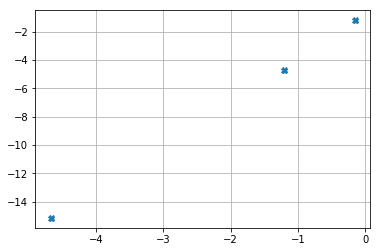

LinregressResult(slope=3.0607400287586688, intercept=-0.84725930950088824, rvalue=0.99984345963489696, pvalue=0.011264552865690886, stderr=0.054163360960491326)

In [35]:
print('**ME581 Homework Printout**\n')
print('Newton\'s method is applied to function f(x)=sin(x)')
# function and derivative is given
def f7(x):
    var = np.sin(x)
    return var
def df7(x):
    var = np.cos(x)
    return var
epsilon7 = 1.0e-6
Nmax7 = 3
# array to save iterated values
p7 = np.zeros(Nmax7+1)
# array to save error
err7 = np.zeros(Nmax7+1)
#err42 = np.zeros(Nmax4+1)
# set the initial iterated value
p7[0] = 4.0
err7[0] = np.abs(p7[0]-math.pi)
# now begin iteration
print('\n')
print("Iteration from starting point p0={0:2.1f}".format(p7[0]))
for ind7 in range(0,Nmax7):
    if (df7(p7[ind7]) == 0.0):
        print('Choose another starting point')
        break
    else:
        p7[ind7+1] = p7[ind7] - f7(p7[ind7])/df7(p7[ind7])
        err7[ind7+1] = np.abs(p7[ind7+1] - math.pi)
        #err42[ind4+1] = np.abs(p4[ind4+1] - 3.0**(1.0/7))
        if (err7[ind7+1] < (2*epsilon7)):
            print("Root Estimate #{0:1d}: p({1:1d}) = \
            {2:7.6f}, starting point p0={3:2.1f}".format(ind7+1,ind7+1,p7[ind7+1],p7[0]))
            print("The convergence tolerance has been met")
            break
        print("Root Estimate #{0:1d}: p({1:1d}) = \
        {2:7.6f}, starting point {3:2.1f}".format(ind7+1,ind7+1,p7[ind7+1],p7[0]))
if (ind7 >= (Nmax7-1)):
    print('The maximum number of {0:1d} iterations \
    has been met.\n'.format(Nmax7))
print('**Error Printout**\n')
for ii7 in range(0,Nmax7+1):
    print("Error Estimate #{0:1d}: |p{1:d}-pi| \
    = {2:7.6f}, starting point p0={3:2.1f}".format(ii7,ii7,err7[ii7],p7[0]))
# plot the log error figure
plt.figure()
plt.plot(np.log(err7[:-1]),np.log(err7[1:]),"X")
plt.grid(True)
plt.show()
linregress(np.log(err7[:-1]),np.log(err7[1:]))

From figure above, the apparent order of convergence is 3. We can prove this analytically as below:
$$g(x) = x - \frac{f(x)}{f'(x)} = x - \tan(x)$$
The first derivative of $g(x)$ is:
$$g'(x) = 1 - \frac{1}{\cos^2(x)}$$
The second derivative of $g(x)$ is:
$$g''(x) = -\frac{2\sin(x)}{\cos^3(x)}$$
The third derivative of 
$$g^{(3)}(x) = -\frac{2\cos^2(x)+6\sin^2(x)}{\cos^4(x)}$$
We see that the fixed point $s$ of function $g(x)$ is the zero point of function $f(x)=\sin(x)$. Then we use Taylor series to expand $g(x_{n})$ about the fixed point $s$. That is,
$$x_{n+1} = g(x_n) = g(s) + g'(s)(x_{n}-s) + \frac{1}{2}g''(s)(x_{n}-s)^2 + \cdots$$
$$\epsilon_{n+1} = g'(s)\epsilon_{n} + \frac{1}{2}g''(s)\epsilon^2_{n} + \frac{1}{6}g^{(3)}(s)\epsilon_{n}^3 + \cdots$$
For this problem, the fixed point is $s = \pi$, hence $g'(s) = 0$, $g''(s) = 0$ but $g^{(3)}(s)\neq 0$. Therefore, we can conclude that Newton's method applied to function $f(x) = \sin(x)$ at point $s=\pi$ has order of convergence equal to 3.

## Problem 8
(a) Verify that the equation $x^4 - 18x^2 + 45 = 0$ has a root on the interval $(1,2)$. Next, perform three iterations of Newton's method, with $p_0 = 1$. Given that the exact value of the root is $x = \sqrt{3}$, compute the absolute error in the approximation just obtained. What is the apparent order of convergence? What explanation can you provide for this behavior?

(b) Verify that the equation $x^4 - 18x^2 + 45 = 0$ also has a root on the interval $(3,4)$. Perform five iterations of Newton's method, and compute the absolute error in each approximation. The exact value of the root is $x = \sqrt{15}$. What is the apparent order of convergence in this case?

(c) What explanation can you provide for the different convergence behavior between parts (a) and (b)?

Solution: 
(a) suppose $f(x) = x^4 - 18x^2 + 45$, then we have: $f(1) = 26 > 0$ and $f(2) = -11 < 0$, then we conclude there is a root for equation $x^4 - 18x^2 + 45 = 0$ in $(1,2)$.

**ME581 Homework Printout**

Newton's method is applied to function f(x)=x^4-18x^2+45


Iteration from starting point p0=1.0
Root Estimate #1: p(1) =         1.875000, starting point 1.0
Root Estimate #2: p(2) =         1.731036, starting point 1.0
Root Estimate #3: p(3) =             1.732051, starting point p0=1.0
The convergence tolerance has been met
The maximum number of 3 iterations     has been met.

**Error Printout**

Error Estimate #0: |p0-pi|     = 0.732051, starting point p0=1.0
Error Estimate #1: |p1-pi|     = 0.142949, starting point p0=1.0
Error Estimate #2: |p2-pi|     = 0.001014, starting point p0=1.0
Error Estimate #3: |p3-pi|     = 0.000000, starting point p0=1.0


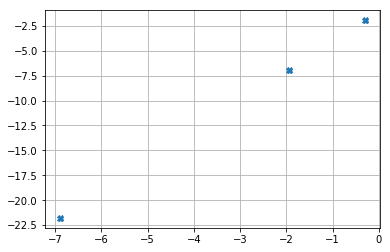

LinregressResult(slope=3.012348659444378, intercept=-1.0176542971056062, rvalue=0.99999903490201392, pvalue=0.00088446542503117797, stderr=0.0041851039934912891)

In [36]:
print('**ME581 Homework Printout**\n')
print('Newton\'s method is applied to function f(x)=x^4-18x^2+45')
# function and derivative is given
def f81(x):
    var = x**4.0 - 18.0*x**2 + 45
    return var
def df81(x):
    var = 4.0*x**3.0 - 36.0*x
    return var
epsilon81 = 1.0e-6
Nmax81 = 3
# array to save iterated values
p81 = np.zeros(Nmax81+1)
# array to save error
err81 = np.zeros(Nmax81+1)
#err42 = np.zeros(Nmax4+1)
# set the initial iterated value
p81[0] = 1.0
err81[0] = np.abs(p81[0]-np.sqrt(3))
# now begin iteration
print('\n')
print("Iteration from starting point p0={0:2.1f}".format(p81[0]))
for ind81 in range(0,Nmax81):
    if (df81(p81[ind81]) == 0.0):
        print('Choose another starting point')
        break
    else:
        p81[ind81+1] = p81[ind81] - f81(p81[ind81])/df81(p81[ind81])
        err81[ind81+1] = np.abs(p81[ind81+1] - np.sqrt(3))
        #err42[ind4+1] = np.abs(p4[ind4+1] - 3.0**(1.0/7))
        if (err81[ind81+1] < (2*epsilon81)):
            print("Root Estimate #{0:1d}: p({1:1d}) = \
            {2:7.6f}, starting point p0={3:2.1f}".format(ind81+1,ind81+1,p81[ind81+1],p81[0]))
            print("The convergence tolerance has been met")
            break
        print("Root Estimate #{0:1d}: p({1:1d}) = \
        {2:7.6f}, starting point {3:2.1f}".format(ind81+1,ind81+1,p81[ind81+1],p81[0]))
if (ind81 >= (Nmax81-1)):
    print('The maximum number of {0:1d} iterations \
    has been met.\n'.format(Nmax81))
print('**Error Printout**\n')
for ii81 in range(0,Nmax81+1):
    print("Error Estimate #{0:1d}: |p{1:d}-pi| \
    = {2:7.6f}, starting point p0={3:2.1f}".format(ii81,ii81,err81[ii81],p81[0]))
# plot the log error figure
plt.figure()
plt.plot(np.log(err81[:-1]),np.log(err81[1:]),"X")
plt.grid(True)
plt.show()
linregress(np.log(err81[:-1]),np.log(err81[1:]))

The apparent order of convergence is 3, which can be explained as the same way as Problem 7.

(b) $f(3) = -36 < 0$ and $f(4) = 13 > 0$, so this equation also has a root in $(3,4)$.

**ME581 Homework Printout**

Newton's method is applied to function f(x)=x^4-18x^2+45


Iteration from starting point p0=5.0
Root Estimate #1: p(1) =         4.312500, starting point 5.0
Root Estimate #2: p(2) =         3.973559, starting point 5.0
Root Estimate #3: p(3) =         3.880028, starting point 5.0
Root Estimate #4: p(4) =         3.873021, starting point 5.0
Root Estimate #5: p(5) =             3.872983, starting point p0=5.0
The convergence tolerance has been met
The maximum number of 5 iterations     has been met.

**Error Printout**

Error Estimate #0: |p0-pi|     = 1.127017, starting point p0=5.0
Error Estimate #1: |p1-pi|     = 0.439517, starting point p0=5.0
Error Estimate #2: |p2-pi|     = 0.100575, starting point p0=5.0
Error Estimate #3: |p3-pi|     = 0.007044, starting point p0=5.0
Error Estimate #4: |p4-pi|     = 0.000038, starting point p0=5.0
Error Estimate #5: |p5-pi|     = 0.000000, starting point p0=5.0


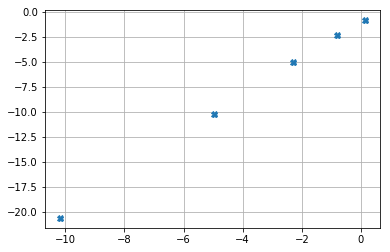

LinregressResult(slope=1.9375941761463078, intercept=-0.74517024560224154, rvalue=0.99959971886927224, pvalue=9.6129228449155708e-06, stderr=0.031661403332013338)

In [37]:
print('**ME581 Homework Printout**\n')
print('Newton\'s method is applied to function f(x)=x^4-18x^2+45')
# function and derivative is given
def f82(x):
    var = x**4.0 - 18.0*x**2 + 45
    return var
def df82(x):
    var = 4.0*x**3.0 - 36.0*x
    return var
epsilon82 = 1.0e-6
Nmax82 = 5
# array to save iterated values
p82 = np.zeros(Nmax82+1)
# array to save error
err82 = np.zeros(Nmax82+1)
#err42 = np.zeros(Nmax4+1)
# set the initial iterated value
p82[0] = 5.0
err82[0] = np.abs(p82[0]-np.sqrt(15))
# now begin iteration
print('\n')
print("Iteration from starting point p0={0:2.1f}".format(p82[0]))
for ind82 in range(0,Nmax82):
    if (df82(p82[ind82]) == 0.0):
        print('Choose another starting point')
        break
    else:
        p82[ind82+1] = p82[ind82] - f82(p82[ind82])/df82(p82[ind82])
        err82[ind82+1] = np.abs(p82[ind82+1] - np.sqrt(15))
        #err42[ind4+1] = np.abs(p4[ind4+1] - 3.0**(1.0/7))
        if (err82[ind82+1] < (2*epsilon82)):
            print("Root Estimate #{0:1d}: p({1:1d}) = \
            {2:7.6f}, starting point p0={3:2.1f}".format(ind82+1,ind82+1,p82[ind82+1],p82[0]))
            print("The convergence tolerance has been met")
            break
        print("Root Estimate #{0:1d}: p({1:1d}) = \
        {2:7.6f}, starting point {3:2.1f}".format(ind82+1,ind82+1,p82[ind82+1],p82[0]))
if (ind82 >= (Nmax82-1)):
    print('The maximum number of {0:1d} iterations \
    has been met.\n'.format(Nmax82))
print('**Error Printout**\n')
for ii82 in range(0,Nmax82+1):
    print("Error Estimate #{0:1d}: |p{1:d}-pi| \
    = {2:7.6f}, starting point p0={3:2.1f}".format(ii82,ii82,err82[ii82],p82[0]))
# plot the log error figure
plt.figure()
plt.plot(np.log(err82[:-1]),np.log(err82[1:]),"X")
plt.grid(True)
plt.show()
linregress(np.log(err82[:-1]),np.log(err82[1:]))

The apparent order of convergence is 2 for this case.

(c) It is easy to explain this difference, construct $g(x) = x - \tfrac{f(x)}{f'(x)}$, then $g'(\sqrt{3}) = g'(\sqrt{15}) = 0$, $g''(\sqrt{3}) = 0$, however $g''(\sqrt{15}) \neq 0$ and $g^{(3)}(\sqrt{3}) \neq 0$. Then detailed explanation is given in problem 7.

## Problem 9
The function $f(x) = \sin(x)$ has a zero on the interval $(3,4)$, namely $x = \pi$. Perform five iterations of the secant method to approximate this zero, using $p_0 = 3$ and $p_1 = 4$. Determine the absolute error in each of the computer approximations. What is the apparent order of convergence? What explanation can you provide for this behavior?

Solution: The algorithm is implemented below:

**ME581 Homework Printout**

Secant method is applied to function f(x)=sin(x)


Iteration from starting point p0=3.0, p1=4.0
Root Estimate #2: p(2) =     3.157162792480
Root Estimate #3: p(3) =     3.139459098218
Root Estimate #4: p(4) =     3.141592727985
Root Estimate #5: p(5) =         3.141592653590
The convergence tolerance has been met
**Error Printout**

Error Estimate #0: |p0-pi|     = 0.141592653590
Error Estimate #1: |p1-pi|     = 0.858407346410
Error Estimate #2: |p2-pi|     = 0.015570138890
Error Estimate #3: |p3-pi|     = 0.002133555372
Error Estimate #4: |p4-pi|     = 0.000000074395
Error Estimate #5: |p5-pi|     = 0.000000000000
Error Estimate #6: |p6-pi|     = 0.000000000000


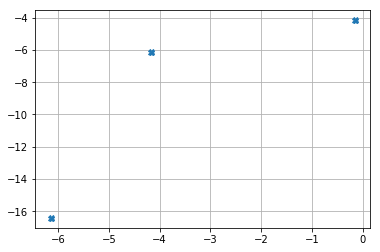

LinregressResult(slope=1.8188054126673969, intercept=-2.5641221163018173, rvalue=0.84504813095133324, pvalue=0.35914341025206276, stderr=1.1508190754555108)

In [38]:
print('**ME581 Homework Printout**\n')
print('Secant method is applied to function f(x)=sin(x)')
# function and derivative is given
def f9(x):
    var = np.sin(x)
    return var
epsilon9 = 1.0e-12
Nmax9 = 5
# array to save iterated values
p9 = np.zeros(Nmax9+2)
# array to save error
err9 = np.zeros(Nmax9+2)
#err42 = np.zeros(Nmax4+1)
# set the initial iterated value
p9[0] = 3.0
p9[1] = 4.0
err9[0] = np.abs(p9[0]-math.pi)
err9[1] = np.abs(p9[1]-math.pi)
# now begin iteration
print('\n')
print("Iteration from starting point p0={0:2.1f}, p1={1:2.1f}".format(p9[0],p9[1]))
for ind9 in range(0,Nmax9):
    p9[ind9+2] = p9[ind9+1] - f9(p9[ind9+1])*(p9[ind9+1] - p9[ind9])/(f9(p9[ind9+1]) - f9(p9[ind9]))
    err9[ind9+2] = np.abs(p9[ind9+2] - math.pi)
    #err42[ind4+1] = np.abs(p4[ind4+1] - 3.0**(1.0/7))
    if (err9[ind9+2] < (2*epsilon9)):
        print("Root Estimate #{0:1d}: p({1:1d}) = \
        {2:13.12f}".format(ind9+2,ind9+2,p9[ind9+2]))
        print("The convergence tolerance has been met")
        break
    print("Root Estimate #{0:1d}: p({1:1d}) = \
    {2:13.12f}".format(ind9+2,ind9+2,p9[ind9+2]))
if (ind9 >= (Nmax9-1)):
    print('The maximum number of {0:1d} iterations \
    has been met.\n'.format(Nmax9))
print('**Error Printout**\n')
for ii9 in range(0,Nmax9+2):
    print("Error Estimate #{0:1d}: |p{1:d}-pi| \
    = {2:13.12f}".format(ii9,ii9,err9[ii9]))
# plot the log error figure
plt.figure()
plt.plot(np.log(err9[1:4]),np.log(err9[2:5]),"X")
plt.grid(True)
plt.show()
linregress(np.log(err9[1:4]),np.log(err9[2:5]))

The absolute error for each computer approximation are shown above. The apparent order of convergence is 1.81881, which approaches the golden ratio (1.618).